## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading data

In [2]:
df = pd.read_csv("RentingOutofFlats2024CSV.csv")

In [3]:
df.head()

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450


## Data Exploration

In [4]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'TENGAH'], dtype=object)

In [5]:
df['flat_type'].unique()

array(['4-ROOM', '3-ROOM', '5-ROOM', '2-ROOM', 'EXECUTIVE', '1-ROOM'],
      dtype=object)

In [6]:
date = df['rent_approval_date'].str.split("-",n=1, expand=True)

In [7]:
df['rent_approval_year'] = date[0]

In [8]:
df.describe()

,monthly_rent
count,142826.000000
mean,2684.562300
std,748.502989
min,300.000000
25%,2100.000000
50%,2600.000000
75%,3200.000000
max,7600.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142826 entries, 0 to 142825
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   rent_approval_date  142826 non-null  object
 1   town                142826 non-null  object
 2   block               142826 non-null  object
 3   street_name         142826 non-null  object
 4   flat_type           142826 non-null  object
 5   monthly_rent        142826 non-null  int64 
 6   rent_approval_year  142826 non-null  object
dtypes: int64(1), object(6)
memory usage: 7.6+ MB


<AxesSubplot:>

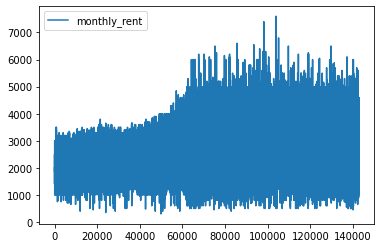

In [10]:
df.plot()

In [77]:
average_price_by_year =df.groupby('rent_approval_year')['monthly_rent'].mean().round(2).reset_index()
average_price_by_year.columns = ['rent_approval_year', 'average_rent_byyear']

no_of_rents = df.groupby('rent_approval_year')['monthly_rent'].value_counts()
no_of_rents.columns = ['rent_approval_year', 'no_of_rents']
no_of_rents_df = no_of_rents.reset_index(name='count')

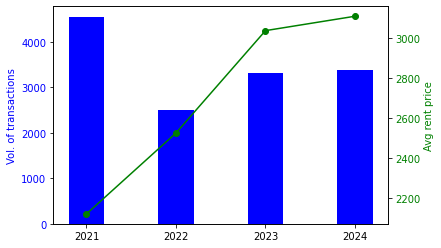

In [82]:
# Create the plot
fig, ax1 = plt.subplots()

ax1.bar(no_of_rents_df["rent_approval_year"], no_of_rents_df["count"], color='blue', label='Vol. of transactions', width=0.4)
ax1.set_ylabel('Vol. of transactions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(average_price_by_year['rent_approval_year'], average_price_by_year['average_rent_byyear'], color='green', marker='o', label='Line Data')
ax2.set_ylabel('Avg rent price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

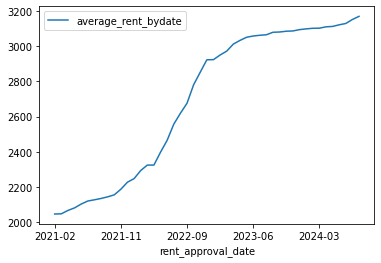

In [48]:
average_price_by_date = average_price_by_date.sort_values(by='average_rent_bydate', ascending=True)
ax = average_price_by_date.plot.line(x='rent_approval_date', y='average_rent_bydate', rot=0)

In [17]:
average_price_by_type =df.groupby('flat_type')['monthly_rent'].mean().round(2).reset_index()
average_price_by_type.columns = ['flat_type', 'average_rent_bytype']

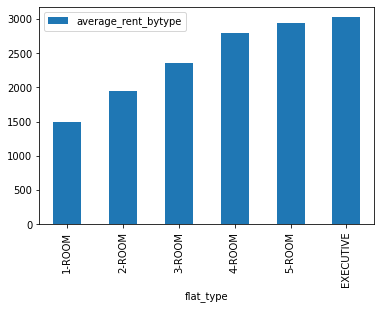

In [20]:
average_price_by_type = average_price_by_type.sort_values(by='average_rent_bytype', ascending=True)
ax = average_price_by_type.plot.bar(x='flat_type', y='average_rent_bytype', rot=90)

In [42]:
average_price_by_town =df.groupby('town')['monthly_rent'].mean().round(2).reset_index()
average_price_by_town.columns = ['town', 'average_rent_bytown']

In [43]:
average_price_by_town = average_price_by_town.sort_values(by='average_rent_bytown', ascending=False)

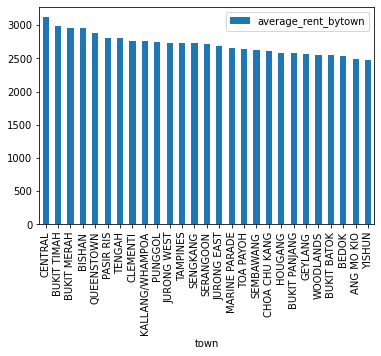

In [44]:
ax = average_price_by_town.plot.bar(x='town', y='average_rent_bytown', rot=90)

In [45]:
average_price_by_town_type =df.groupby(['town','flat_type'])['monthly_rent'].mean().round(2).reset_index()
average_price_by_town_type.columns = ['town', 'flat_type', 'average_rent_bytown_bytype']
average_price_by_town_type = average_price_by_town_type.sort_values(by='average_rent_bytown_bytype', ascending=False)

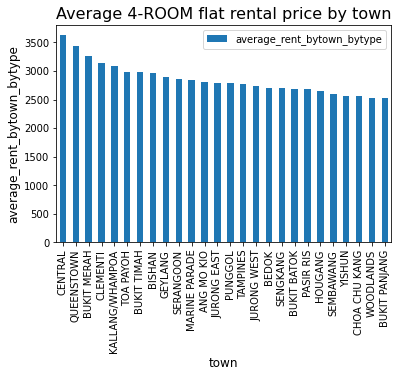

In [46]:
ax = average_price_by_town_type[average_price_by_town_type['flat_type'] == '4-ROOM'].plot.bar(x='town', y='average_rent_bytown_bytype', rot=90)
ax.set_title('Average 4-ROOM flat rental price by town', fontsize=16)
ax.set_xlabel('town', fontsize=12)
ax.set_ylabel('average_rent_bytown_bytype', fontsize=12)
plt.show()

In [23]:
df['address'] = df['block'] + " " + df['street_name']

## Supplementing with other datasets

In [24]:
df_info = pd.read_csv("HDBPropertyInformation.csv")

In [25]:
df_info.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,2,2010,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,0,10,92,0,0,0,0,0,0,0
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,54,0,1,0,0,0,0,0,0,0


In [26]:
df_info['address'] = df_info['blk_no'] + " " + df_info['street']

In [69]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12877 entries, 0 to 12876
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   blk_no                 12877 non-null  object
 1   street                 12877 non-null  object
 2   max_floor_lvl          12877 non-null  int64 
 3   year_completed         12877 non-null  int64 
 4   residential            12877 non-null  object
 5   commercial             12877 non-null  object
 6   market_hawker          12877 non-null  object
 7   miscellaneous          12877 non-null  object
 8   multistorey_carpark    12877 non-null  object
 9   precinct_pavilion      12877 non-null  object
 10  bldg_contract_town     12877 non-null  object
 11  total_dwelling_units   12877 non-null  int64 
 12  1room_sold             12877 non-null  int64 
 13  2room_sold             12877 non-null  int64 
 14  3room_sold             12877 non-null  int64 
 15  4room_sold         

In [70]:
#Recode 
df_info['residential'] = df_info['residential'].map({'Y': 1, 'N': 0})
df_info['commercial'] = df_info['commercial'].map({'Y': 1, 'N': 0})
df_info['market_hawker'] = df_info['market_hawker'].map({'Y': 1, 'N': 0})
df_info['miscellaneous'] = df_info['miscellaneous'].map({'Y': 1, 'N': 0})
df_info['multistorey_carpark'] = df_info['multistorey_carpark'].map({'Y': 1, 'N': 0})
df_info['precinct_pavilion'] = df_info['precinct_pavilion'].map({'Y': 1, 'N': 0})
df_info['bldg_contract_town'] = df_info['bldg_contract_town'].map({'Y': 1, 'N': 0})

In [84]:
df_info = df_info.drop(columns=['blk_no','street'])

In [110]:
df_resale = pd.read_csv("Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [111]:
df_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [112]:
df_resale['address'] = df_resale['block'] + " " + df_resale['street_name']

In [113]:
df_resale['remaining_lease_yr'] = df_resale['remaining_lease'].str[:2]

In [114]:
df_resale = df_resale.drop(columns=['block','street_name','town','remaining_lease'])

In [115]:
df_resale = df_resale.rename(columns={"month": "resale_month"})

In [116]:
df_resale['min'] = df_resale['storey_range'].str[:2].astype('int64')
df_resale['max'] = df_resale['storey_range'].str[-2:].astype('int64')
df_resale['avg_level'] = df_resale['max'] - df_resale['min']
df_resale = df_resale.drop(columns=['storey_range','min','max'])

In [127]:
# Merge Rent Price and Resale Price datasets on 'address' and 'flat_type'
merged_df = pd.merge(df, df_resale, on=['address', 'flat_type'], how='inner')

In [128]:
# Merge with info dataset on 'Address' and 'flat_type'
merged_df = pd.merge(merged_df, df_info, on=['address'], how='inner')

In [129]:
merged_df = pd.merge(merged_df, average_price_by_town, on=['town'], how='inner')

In [130]:
merged_df = pd.merge(merged_df, average_price_by_town_type, on=['town','flat_type'], how='inner')

In [131]:
merged_df.tail()

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,rent_approval_year,address,resale_month,floor_area_sqm,...,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,average_rent_bytown,average_rent_bytown_bytype
113595,2024-09,CLEMENTI,201,CLEMENTI AVE 6,EXECUTIVE,3000,2024,201 CLEMENTI AVE 6,2024-01,148.0,...,0,88,0,0,0,0,0,0,2766.58,3552.83
113596,2024-09,CLEMENTI,201,CLEMENTI AVE 6,EXECUTIVE,3000,2024,201 CLEMENTI AVE 6,2024-03,150.0,...,0,88,0,0,0,0,0,0,2766.58,3552.83
113597,2024-09,CLEMENTI,201,CLEMENTI AVE 6,EXECUTIVE,3000,2024,201 CLEMENTI AVE 6,2024-06,149.0,...,0,88,0,0,0,0,0,0,2766.58,3552.83
113598,2024-09,CLEMENTI,201,CLEMENTI AVE 6,EXECUTIVE,3000,2024,201 CLEMENTI AVE 6,2024-08,150.0,...,0,88,0,0,0,0,0,0,2766.58,3552.83
113599,2021-08,CENTRAL,637,VEERASAMY RD,EXECUTIVE,3100,2021,637 VEERASAMY RD,2023-06,146.0,...,0,1,0,0,0,0,0,0,3117.33,3100.00


## Analysis & Insights

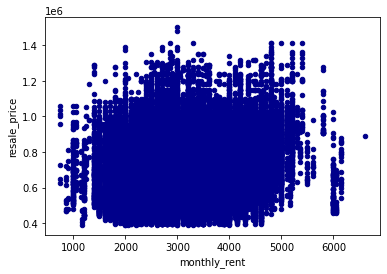

In [132]:
ax = merged_df.plot.scatter(x='monthly_rent',
                      y='resale_price',
                      c='DarkBlue') 

## Model 1: Principal Component Analysis (PCA)

In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [139]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113600 entries, 0 to 113599
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rent_approval_date          113600 non-null  object 
 1   town                        113600 non-null  object 
 2   block                       113600 non-null  object 
 3   street_name                 113600 non-null  object 
 4   flat_type                   113600 non-null  object 
 5   monthly_rent                113600 non-null  int64  
 6   rent_approval_year          113600 non-null  int64  
 7   address                     113600 non-null  object 
 8   resale_month                113600 non-null  object 
 9   floor_area_sqm              113600 non-null  float64
 10  flat_model                  113600 non-null  object 
 11  lease_commence_date         113600 non-null  int64  
 12  resale_price                113600 non-null  float64
 13  remaining_leas

In [135]:
merged_df = merged_df.drop(columns = ['bldg_contract_town'])

In [138]:
merged_df['remaining_lease_yr'] = merged_df['remaining_lease_yr'].astype('int64')
merged_df['rent_approval_year'] = merged_df['rent_approval_year'].astype('int64')

In [169]:
# Step 1: Preprocess the data
# Encode categorical variables
data_encoded = pd.get_dummies(merged_df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)

# Separate features and target
features = data_encoded.drop(columns=['monthly_rent', 'rent_approval_date', 'block', 'street_name', 'address', 'resale_month','average_rent_bytown', 'average_rent_bytown_bytype'])
target = data_encoded['monthly_rent']

In [170]:
# Step 2: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [171]:
# Step 3: Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

In [172]:
# Step 4: Analyse variance explained by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

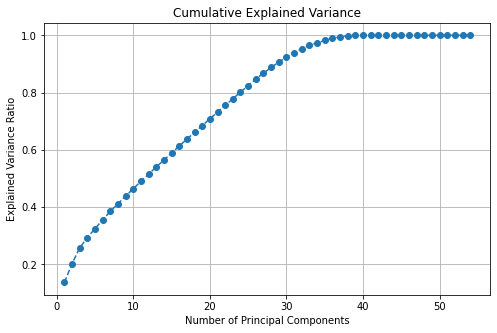

In [173]:
# Plot variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [174]:
# Step 5: Interpret PCA results
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features.columns
)

print("Feature Loadings:")
print(loadings)

Feature Loadings:
                                        PC1           PC2           PC3  \
rent_approval_year            -6.867963e-04  7.523509e-03 -2.551368e-03   
floor_area_sqm                -3.141167e-01  8.999992e-02  1.027547e-01   
lease_commence_date            3.768263e-01 -1.097679e-01  6.236109e-02   
resale_price                  -1.965260e-01  7.329097e-02 -1.475180e-01   
remaining_lease_yr             3.682829e-01 -1.167504e-01  7.301954e-02   
avg_level                     -0.000000e+00  0.000000e+00 -1.387779e-16   
max_floor_lvl                  2.236350e-01 -3.825249e-02 -3.354724e-01   
year_completed                 3.753428e-01 -1.176892e-01  3.923872e-02   
residential                   -0.000000e+00  0.000000e+00  0.000000e+00   
commercial                    -5.512584e-02  4.058610e-02  5.408711e-02   
market_hawker                 -0.000000e+00  0.000000e+00  0.000000e+00   
miscellaneous                  2.775674e-02 -1.090290e-02 -2.471835e-01   
multist

## Model 2 : Regression

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [192]:
# Step 1: Preprocess the data
# Encode categorical variables
data_encoded = pd.get_dummies(merged_df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)

# Separate features and target
X = data_encoded.drop(columns=['monthly_rent', 'rent_approval_date', 'block', 'street_name', 'address', 'resale_month','average_rent_bytown', 'average_rent_bytown_bytype'])
y = data_encoded['monthly_rent']

In [193]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [194]:
# Step 3: Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [195]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 436.5961861562427
Mean Squared Error (MSE): 332936.2910771493
R^2 Score: 0.4609570730525824


In [196]:
# Step 5: Interpret coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)


Feature Importance:
                          Feature   Coefficient
0              rent_approval_year  4.409865e+02
31               town_BUKIT TIMAH  4.341296e+02
34                  town_CLEMENTI  3.827722e+02
12            multistorey_carpark  3.638897e+02
28                    town_BISHAN  3.035224e+02
42                town_QUEENSTOWN  2.498560e+02
39           town_KALLANG/WHAMPOA  1.954574e+02
19                     5room_sold  1.429307e+02
20                      exec_sold  1.423909e+02
18                     4room_sold  1.420636e+02
17                     3room_sold  1.417749e+02
37               town_JURONG EAST  1.046869e+02
46                  town_TAMPINES  8.592591e+01
45                 town_SERANGOON  7.633192e+01
35                   town_GEYLANG  3.694726e+01
27                     town_BEDOK  3.635895e+01
4              remaining_lease_yr  2.892111e+01
47                 town_TOA PAYOH  2.864324e+01
11                  miscellaneous  1.893565e+01
29               to

## Model 3: Random Forest

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [198]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [199]:
# Step 3: Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=77)

In [200]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 429.6085704623643
Mean Squared Error (MSE): 351809.8198347592
R^2 Score: 0.43039974885577126


In [201]:
# Step 5: Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                          Feature    Importance
0              rent_approval_year  5.282603e-01
3                    resale_price  1.226742e-01
4              remaining_lease_yr  4.476176e-02
14           total_dwelling_units  3.808480e-02
1                  floor_area_sqm  3.728200e-02
20                      exec_sold  3.714738e-02
6                   max_floor_lvl  3.156239e-02
7                  year_completed  2.862904e-02
2             lease_commence_date  2.815460e-02
11                  miscellaneous  1.721148e-02
19                     5room_sold  8.443388e-03
38               town_JURONG WEST  7.983430e-03
9                      commercial  7.180172e-03
28                    town_BISHAN  4.552621e-03
46                  town_TAMPINES  4.539004e-03
36                   town_HOUGANG  4.293448e-03
37               town_JURONG EAST  3.827593e-03
45                 town_SERANGOON  3.395506e-03
31               town_BUKIT TIMAH  3.200475e-03
18                 

## Model 4: XGBoost

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [203]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [204]:
# Step 3: Train an XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=77)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=77, ...)

In [205]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 403.96460753427425
Mean Squared Error (MSE): 285363.18258725415
R^2 Score: 0.5379806608429498


In [206]:
# Step 5: Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                          Feature  Importance
0              rent_approval_year    0.351636
37               town_JURONG EAST    0.055064
3                    resale_price    0.037213
31               town_BUKIT TIMAH    0.036272
46                  town_TAMPINES    0.034584
28                    town_BISHAN    0.028925
49                    town_YISHUN    0.028050
38               town_JURONG WEST    0.026330
51          flat_model_Maisonette    0.025824
34                  town_CLEMENTI    0.022165
48                 town_WOODLANDS    0.020899
45                 town_SERANGOON    0.020487
35                   town_GEYLANG    0.019408
40                 town_PASIR RIS    0.015403
33             town_CHOA CHU KANG    0.015396
20                      exec_sold    0.015175
43                 town_SEMBAWANG    0.015093
2             lease_commence_date    0.014966
7                  year_completed    0.014669
11                  miscellaneous    0.014394
30           